# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the counter 
record = 1

# Beginning Data Retrieval Print Statement
print(f"Beginning Data Retrieval")
print(f"------------------------")

# Loop through cities in the city list 
for city in cities:  
    
    # Try statement to append calls where a value is found 
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
------------------------
Processing Record 1 | Watsa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=watsa
City not found. Skipping...
Processing Record 2 | Camopi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=camopi
Processing Record 3 | Arraial do Cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=arraial do cabo
Processing Record 4 | Bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=bluff
Processing Record 5 | Tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=tasiilaq
Processing Record 6 | Billings
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=billings
Processing Record 7 | Kavaratti
http://api.openweathermap.org/data

Processing Record 57 | Bose
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=bose
Processing Record 58 | Adrar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=adrar
Processing Record 59 | Uzhur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=uzhur
City not found. Skipping...
Processing Record 60 | Tremedal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=tremedal
Processing Record 61 | Touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=touros
City not found. Skipping...
Processing Record 62 | Chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=chokurdakh
Processing Record 63 | Fort Payne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPI

Processing Record 113 | Severo-Yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=severo-yeniseyskiy
Processing Record 114 | Kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=kodiak
Processing Record 115 | Yar-Sale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=yar-sale
Processing Record 116 | Kyabe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=kyabe
Processing Record 117 | Husavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=husavik
Processing Record 118 | Mountain Home
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=mountain home
Processing Record 119 | Verkhnyaya Toyma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575

City not found. Skipping...
City not found. Skipping...
Processing Record 168 | Kamenka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=kamenka
Processing Record 169 | Kingseat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=kingseat
Processing Record 170 | Bialystok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=bialystok
Processing Record 171 | Dunedin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=dunedin
Processing Record 172 | Provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=provideniya
Processing Record 173 | Benguela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=benguela
Processing Record 174 | Xining
http://api.openweathermap.org/data/2.5/

Processing Record 224 | Saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=saldanha
City not found. Skipping...
Processing Record 225 | Kokopo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=kokopo
Processing Record 226 | Diego de Almagro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=diego de almagro
Processing Record 227 | Kloulklubed
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=kloulklubed
Processing Record 228 | Deputatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=deputatskiy
Processing Record 229 | Zyryanka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=zyryanka
Processing Record 230 | Itarema
http://api.openweathermap.org/data/2.5/weather

Processing Record 279 | Tazovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=tazovskiy
Processing Record 280 | Taltal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=taltal
Processing Record 281 | Redlands
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=redlands
Processing Record 282 | High Level
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=high level
Processing Record 283 | Uruzgan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=uruzgan
Processing Record 284 | Bonthe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=bonthe
Processing Record 285 | Heilbronn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e

Processing Record 335 | Batagay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=batagay
Processing Record 336 | Finschhafen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=finschhafen
Processing Record 337 | Vardo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=vardo
Processing Record 338 | Beasain
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=beasain
City not found. Skipping...
Processing Record 339 | Rocha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=rocha
Processing Record 340 | Hope
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=hope
Processing Record 341 | Huarmey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1

City not found. Skipping...
Processing Record 391 | Pevek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=pevek
Processing Record 392 | Challapata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=challapata
Processing Record 393 | Camargo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=camargo
Processing Record 394 | Abnub
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=abnub
Processing Record 395 | Colares
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=colares
City not found. Skipping...
Processing Record 396 | La Crosse
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=la crosse
Processing Record 397 | Igarka
http://api.openweathermap.org/data/2.5/weather?units=

Processing Record 447 | Emet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=emet
Processing Record 448 | Rehoboth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=rehoboth
Processing Record 449 | Igurubi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=igurubi
Processing Record 450 | Beyneu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=beyneu
Processing Record 451 | Vereya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=vereya
Processing Record 452 | Mugango
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=mugango
Processing Record 453 | Denpasar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=denpasar
Proce

City not found. Skipping...
Processing Record 503 | Carutapera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=carutapera
Processing Record 504 | Tura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=tura
Processing Record 505 | Belmonte
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=belmonte
Processing Record 506 | Lucapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=lucapa
Processing Record 507 | Mehamn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=mehamn
Processing Record 508 | Boulder City
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=575f4e0d1431e778a2f1ac03d4f8e06e&q=boulder city
Processing Record 509 | Saint Anthony
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a dictonary with the lists generated
weather_dict = {
    "City": city_name,
    "Cloudiness": cloudiness, 
    "Country": country,
    "Date": date, 
    "Humidity": humidity,
    "Lat": lat, 
    "Lng": lng, 
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

# Create a dataframe from dictionary
weather_data = pd.DataFrame(weather_dict)

# Display count of weather data values 
weather_data.count()

City          549
Cloudiness    549
Country       549
Date          549
Humidity      549
Lat           549
Lng           549
Max Temp      549
Wind Speed    549
dtype: int64

In [5]:
# Save dataframe to CSV
weather_data.to_csv('Output_CSV/weather_data.csv')

# Display dataframe head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Watsa,8,CD,1547355714,63,3.04,29.53,72.02,5.75
1,Camopi,92,GF,1547355716,99,3.17,-52.33,72.38,2.28
2,Arraial do Cabo,12,BR,1547355309,93,-22.97,-42.02,75.62,11.18
3,Bluff,0,AU,1547355405,34,-23.58,149.07,94.43,12.30
4,Tasiilaq,64,GL,1547351400,67,65.61,-37.64,17.60,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

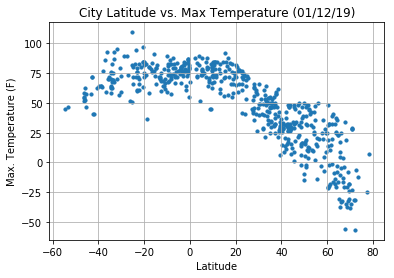

In [6]:
# Build a scatter plot
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Display other graph properties
plt.title("City Latitude vs. Max Temperature (01/12/19)")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

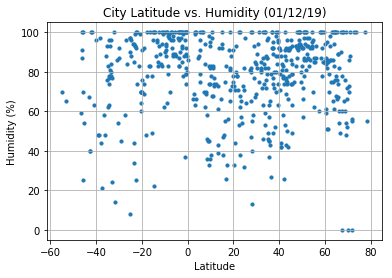

In [7]:
# Build a scatter plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Display other graph properties
plt.title("City Latitude vs. Humidity (01/12/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

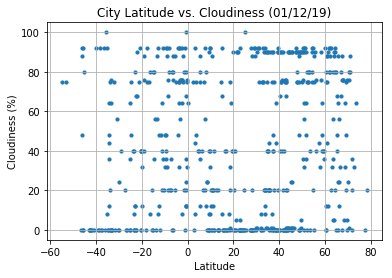

In [8]:
# Build a scatter plot
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Display other graph properties
plt.title("City Latitude vs. Cloudiness (01/12/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

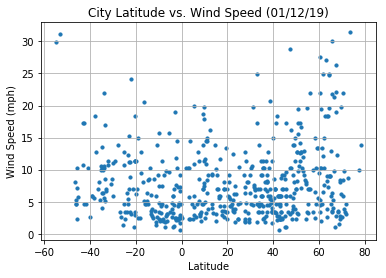

In [9]:
# Build a scatter plot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Display other graph properties
plt.title("City Latitude vs. Wind Speed (01/12/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

In [10]:
# Observable Trends

# 1. The southern hemisphere is very humid close to the equator, however the northern hemisphere does not reach high
# humidty until about the region of the the industrialized countries in North America, Europe, and Asia. This could 
# be due to external factors not related to city latitude. 

# 2. While there is no strong relationship between City Latitude and Cloudiness, we can still see there is a cluster
# of high cloudiness in the northern hemisphere. This could be related to external factors such as proximity to bodies
# of water or possibly pollution. 

# 3. In City Latitude vs Wind Speed, we can see that for the most part wind speed is generally low for cities close
# to the equator. 